# 任务一 sklearn数据处理

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [2]:
#读取数据
data = pd.read_csv('./data.csv')

In [3]:
#数据预览
data.head()

,y,x1,x2,x3,x4,x5,x6
0,2004.8,2564.4,3448.7,417.9,105851,4305.0,4436.5
1,2122.0,2788.7,3967.0,525.7,107507,4950.0,4713.5
2,2199.4,3233.0,4585.8,665.8,109300,5820.0,4208.6
3,2357.2,3865.4,5777.2,810.0,111026,7440.0,5087.4
4,2664.9,4265.9,6484.0,794.0,112704,8101.4,4699.1


In [4]:
#标准化处理
data_scale = preprocessing.scale(data)
data_scale[0:5]

array([[-0.74869052, -1.10497278, -0.92617634, -0.85172969, -2.00437468,
        -0.89725434, -0.20191231],
       [-0.74502666, -1.0883853 , -0.91714604, -0.84056866, -1.81577742,
        -0.88572954,  0.17845101],
       [-0.74260702, -1.05552833, -0.90636473, -0.82606347, -1.61157761,
        -0.87018448, -0.51485382],
       [-0.73767394, -1.00876096, -0.88560706, -0.81113379, -1.41500824,
        -0.84123849,  0.69187283],
       [-0.72805475, -0.9791431 , -0.87329254, -0.81279034, -1.22390545,
        -0.82942066,  0.15867761]])

In [5]:
data_scale.mean(axis=0)

array([-7.93016446e-17,  7.93016446e-17,  1.58603289e-16, -1.26882631e-16,
        2.22044605e-16,  9.51619735e-17, -3.48927236e-16])

In [6]:
data_scale.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [7]:
#min-max标准化
min_max_scaler = preprocessing.MinMaxScaler()
data_min_max = min_max_scaler.fit_transform(data)
data_min_max[0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.63597929],
       [0.00101693, 0.00450318, 0.0026414 , 0.00307355, 0.05603492,
        0.00313104, 0.72676324],
       [0.00168852, 0.01342322, 0.00579497, 0.00706803, 0.11670558,
        0.0073543 , 0.56128736],
       [0.00305774, 0.02611967, 0.01186666, 0.01117941, 0.17510913,
        0.0152183 , 0.84930519],
       [0.00572761, 0.03416036, 0.0154687 , 0.01072323, 0.23188847,
        0.01842895, 0.72204379]])

In [8]:
#正则化处理
data_normalize = preprocessing.normalize(data,norm='l2')
data_normalize[0:5]

array([[0.01888858, 0.02416096, 0.03249255, 0.00393732, 0.99729428,
        0.04056033, 0.04179928],
       [0.01967451, 0.02585594, 0.03678076, 0.00487412, 0.99677058,
        0.04589482, 0.04370207],
       [0.0200486 , 0.02947037, 0.0418018 , 0.00606909, 0.99632276,
        0.05305214, 0.03836344],
       [0.0211151 , 0.03462511, 0.05175045, 0.00725574, 0.99453816,
        0.06664533, 0.04557143],
       [0.02350154, 0.03762063, 0.05718187, 0.00700222, 0.99392743,
        0.07144559, 0.04144098]])

In [9]:
#二值化处理
binarizer = preprocessing.Binarizer(threshold=10000)
data_binary = binarizer.transform(data)
data_binary[0:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [10]:
#one_hot编码
one_hot = preprocessing.OneHotEncoder()
one_hot.fit([[0,0,3],[1,1,0],[0,2,1],[1,0,2]])
one_hot.transform([[0,1,3]]).toarray()

C:\Users\PRO\Desktop\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [11]:
#缺失值处理
from sklearn.preprocessing import Imputer
data.iloc[1,2] = np.nan
imp = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
data_new = imp.fit_transform(data)
data_new[1]

C:\Users\PRO\Desktop\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([  2122.        ,   2788.7       ,  58556.82962963,    525.7       ,
       107507.        ,   4950.        ,   4713.5       ])

# 任务2 下载数据并构建资产组合

In [12]:
from jqdatasdk import *
auth('18888921093','tzr199932059')

auth success 


In [13]:
data = get_extras('unit_net_value', ['510050.XSHG','510300.XSHG','510500.XSHG','511010.XSHG','518880.XSHG','159920.XSHE','513100.XSHG'], start_date='2015-01-01', end_date='2020-01-01', df=True,count=None)

In [14]:
data.head()

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
2015-01-05,2.611,3.6782,1.5180,104.482,2.417,1.0955,1.357
2015-01-06,2.589,3.6757,1.5354,104.489,2.436,1.0860,1.341
2015-01-07,2.590,3.6741,1.5377,104.584,2.442,1.0964,1.358
2015-01-08,2.513,3.5884,1.5254,104.548,2.438,1.1042,1.384
2015-01-09,2.522,3.5749,1.5157,104.514,2.440,1.1075,1.375


In [15]:
#对数收益率
returns = np.log(data)
logreturn = returns.diff()

In [16]:
logreturn.head()

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,-0.008462,-0.000680,0.011397,0.000067,0.007830,-0.008710,-0.011861
2015-01-07,0.000386,-0.000435,0.001497,0.000909,0.002460,0.009531,0.012597
2015-01-08,-0.030181,-0.023602,-0.008031,-0.000344,-0.001639,0.007089,0.018965
2015-01-09,0.003575,-0.003769,-0.006379,-0.000325,0.000820,0.002984,-0.006524


In [17]:
#缺失值填充
logreturn = pd.DataFrame(imp.fit_transform(logreturn),index = logreturn.index,columns = logreturn.columns)

In [146]:
#标准化处理
logreturn = pd.DataFrame(preprocessing.scale(logreturn),index = logreturn.index,columns = logreturn.columns)

In [18]:
logreturn

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
2015-01-05,0.000129,0.000088,0.001087,0.000112,0.000272,0.000288,0.000696
2015-01-06,-0.008462,-0.000680,0.011397,0.000067,0.007830,-0.008710,-0.011861
2015-01-07,0.000386,-0.000435,0.001497,0.000909,0.002460,0.009531,0.012597
2015-01-08,-0.030181,-0.023602,-0.008031,-0.000344,-0.001639,0.007089,0.018965
2015-01-09,0.003575,-0.003769,-0.006379,-0.000325,0.000820,0.002984,-0.006524
2015-01-12,-0.008362,-0.009330,-0.014220,0.000593,0.011815,0.003155,-0.011705
2015-01-13,-0.006016,0.000028,0.013361,0.002493,0.006459,0.006817,-0.002210
2015-01-14,0.002411,-0.003564,-0.004633,0.001430,0.000805,-0.003941,-0.004435
2015-01-15,0.037027,0.028134,0.012657,-0.000572,-0.010103,0.008757,-0.013423
2015-01-16,0.006936,0.008285,0.013016,0.003055,0.027640,-0.010104,0.012682


In [19]:
#协方差矩阵
logreturn.cov()

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
510050.XSHG,2.346272e-04,2.213955e-04,1.885148e-04,-4.860209e-07,-1.085139e-05,9.485787e-05,3.176792e-05
510300.XSHG,2.213955e-04,2.389140e-04,2.485917e-04,-5.703390e-07,-1.113259e-05,9.914660e-05,3.350627e-05
510500.XSHG,1.885148e-04,2.485917e-04,1.672242e-03,-6.938298e-07,-2.263317e-05,8.238253e-05,2.985470e-05
511010.XSHG,-4.860209e-07,-5.703390e-07,-6.938298e-07,1.017838e-06,9.983303e-07,-6.184036e-07,-1.565605e-07
518880.XSHG,-1.085139e-05,-1.113259e-05,-2.263317e-05,9.983303e-07,5.308891e-05,-1.064370e-05,-1.466868e-06
159920.XSHE,9.485787e-05,9.914660e-05,8.238253e-05,-6.184036e-07,-1.064370e-05,1.287599e-04,3.389390e-05
513100.XSHG,3.176792e-05,3.350627e-05,2.985470e-05,-1.565605e-07,-1.466868e-06,3.389390e-05,1.210340e-04


In [20]:
#皮尔逊相关系数
logreturn.corr()

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
510050.XSHG,1.000000,0.935102,0.300959,-0.031450,-0.097229,0.545750,0.188515
510300.XSHG,0.935102,1.000000,0.393293,-0.036574,-0.098849,0.565284,0.197039
510500.XSHG,0.300959,0.393293,1.000000,-0.016818,-0.075962,0.177540,0.066360
511010.XSHG,-0.031450,-0.036574,-0.016818,1.000000,0.135810,-0.054018,-0.014106
518880.XSHG,-0.097229,-0.098849,-0.075962,0.135810,1.000000,-0.128736,-0.018299
159920.XSHE,0.545750,0.565284,0.177540,-0.054018,-0.128736,1.000000,0.271505
513100.XSHG,0.188515,0.197039,0.066360,-0.014106,-0.018299,0.271505,1.000000


In [21]:
#秩相关系数
logreturn.corr('spearman')

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
510050.XSHG,1.000000,0.897616,0.559730,-0.070434,-0.046670,0.526846,0.156258
510300.XSHG,0.897616,1.000000,0.796380,-0.076476,-0.041926,0.532016,0.164882
510500.XSHG,0.559730,0.796380,1.000000,-0.070865,-0.044365,0.417124,0.129269
511010.XSHG,-0.070434,-0.076476,-0.070865,1.000000,0.139678,-0.080196,-0.009325
518880.XSHG,-0.046670,-0.041926,-0.044365,0.139678,1.000000,-0.096537,-0.014597
159920.XSHE,0.526846,0.532016,0.417124,-0.080196,-0.096537,1.000000,0.283730
513100.XSHG,0.156258,0.164882,0.129269,-0.009325,-0.014597,0.283730,1.000000


In [22]:
cum = logreturn.cumsum()

In [23]:
cum.head()

,510050.XSHG,510300.XSHG,510500.XSHG,511010.XSHG,518880.XSHG,159920.XSHE,513100.XSHG
2015-01-05,0.000129,0.000088,0.001087,0.000112,0.000272,0.000288,0.000696
2015-01-06,-0.008332,-0.000592,0.012485,0.000179,0.008102,-0.008422,-0.011165
2015-01-07,-0.007946,-0.001027,0.013981,0.001088,0.010562,0.001109,0.001432
2015-01-08,-0.038127,-0.024629,0.005950,0.000743,0.008923,0.008198,0.020397
2015-01-09,-0.034552,-0.028398,-0.000429,0.000418,0.009743,0.011182,0.013873


In [24]:
#资产权重
weight = [0.1,0.05,0.1,0.3,0.3,0.1,0.05]

In [25]:
profolio = cum*weight

In [26]:
profolio_return = pd.DataFrame(profolio.sum(axis=1),columns = ['returns'])

In [27]:
import matplotlib.pyplot as plt

C:\Users\PRO\Desktop\WPy64-3740\python-3.7.4.amd64\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


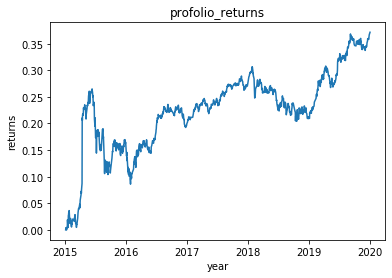

In [28]:
plt.plot(profolio_return)
plt.title('profolio_returns')
plt.xlabel('year')
plt.ylabel('returns')
plt.show()

In [29]:
profolio_return.std()

returns    0.075442
dtype: float64

In [30]:
v = []
for i in range(90,1219):
    V = profolio_return[i-90:i].std()
    v.append(V)

In [31]:
v = pd.DataFrame(v,index = cum.index[90:])

Text(0, 0.5, 'volatility')

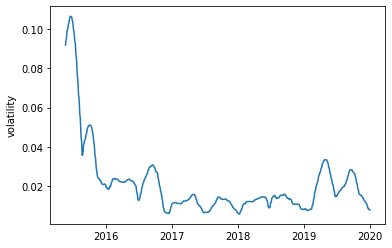

In [32]:
#三个月滚动波动率
plt.plot(v)
plt.ylabel('volatility')

   改变比例可以发现，增大国债etf或者黄金etf的比例可以降低组合的波动性。这是因为其与剩下的资产是负相关的，由马科维兹的资产组合理论，其波动性一定会减小。同样增大300etf或者50etf组合的波动率会上升，因为其与某些资产具有较强的相关性，其无法做到对冲其他资产下跌带来的波动

In [33]:
def target(w):
    weights = np.array(w)
    std  =np.dot(np.dot(weights,np.array(logreturn.cov())),weights.T)
    return std

In [34]:
from scipy.optimize import minimize
mean_r=np.array(logreturn.mean())
R = []
STD = []
X = []

In [35]:
#求解二次规划
for r in np.linspace(-0.015,0.015,100):
    cons=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: np.dot(x,mean_r.T)-r})
    res=minimize(target,weight,method='SLSQP',constraints=cons) 
    R.append(r)
    STD.append(res.fun)
    X.append(res.x)
df = pd.DataFrame([R,STD]).T
df.columns=['return','sigma']

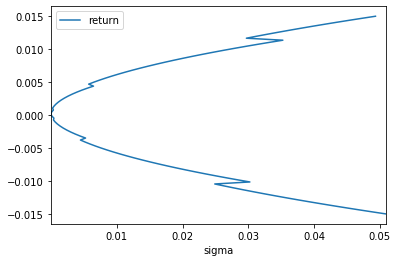

In [36]:
df.plot('sigma','return')

In [37]:
df.idxmin()

return     0
sigma     50
dtype: int64

In [38]:
#方差最小的权重
X[50]

array([ 0.14590884,  0.10348371, -0.02879477,  0.3492471 ,  0.32007987,
        0.11715594, -0.00708069])

In [39]:
weight = list(X[50])